# 비어플 16기 신입세션 1주차

- ---을 하면 수평선
- **을 하면 **굵은 글씨**
- ctrl + / 를 하면 주석처리

--- 

## 0. 도메인 살펴보기 : 건강검진정보 데이터

1. 개요
- 건강검진정보 데이터는 국민건강보험에서 제공하는 건강검진 결과 및 수검 이력 데이터로, 매년 약 **100만 명**의 검진 데이터를 포함하며, 건강 상태와 관련된 통계 및 분석에 유용한 공공데이터
- 대상자 정보 : 성별, 연령대 시도코드 등 기본적인 인구통계학적 정보
- 검진 내역 : 신장, 체중, 총콜레스테롤, 혈색소, 혈압, 공복혈당 등 주요 건강 지표

2. 데이터 변수 설명
- '연령대코드(5세단위)' : 20세-85세 이상까지의 나이 정보가 담겨있음.(5=20-24세, 6=25-29세 , ...)
- '감마지티피' : 간의 상태를 나타내는 주요 지표로, 흡연과 연관지을 수 있음
- '수축기혈압','이완기혈압' : 심장이 수축/이완할 때의 혈압 (정상범위 - 수축기(120mmHg이하), 이완기(80mmHg) 이하)
- 'HDL콜레스테롤' : '좋은 콜레스테롤'로 불리며, 수치가 높을수록 심혈관 질환 위험이 낮아짐 (정상범위 - 40mg/dL)
- 'LDL콜레스테롤' : '나쁜 콜레스테롤'로 불리며, 수치가 높으면 동맥경화 위험이 증가함 (정상범위 - 100mg/dL)
- '간 기능 관련' : '혈정지오티(AST)', '혈청지피티(ALT)', '감마지피티' - 간의 사태를 나타내는 주요 지표, 흡연/음주와 연관?


## 1. 가설 세우기
- 연령대가 높아질수록 대사증후군 관련 지표(허리둘레, 공복혈당, 혈압 등)의 값이 높아질 것이다.
- 흡연자는 비흡연자보다 간 기능 수치(감마지티피, 혈청지오티 등)가 나쁠 것이다.
- 특정 지역(시도코드)에 따라 평균 체질량지수(BMI)가 다를 수 있다.
- 등등.. **도메인에 맞게 가설을 설정하고, EDA&전처리를 통해 확인**


## 2. 라이브러리 로드 & 한글폰트 설정

pandas : 데이터 분석 라이브러리  
numpy : 다양한 계산과 분석 라이브러리  
matplotlib : 시각화 도구 제공  
seaborn : 더 정돈된 시각화 도구

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글폰트 사용을 위해 설치
# 아래 코드 실행하면 한글 폰트 설치할 필요 없음!

import koreanize_matplotlib

## 3. 데이터 불러오기

### 건강검진정보 데이터 소개
- 총 32개 변수
- 주요 항목 : 성별, 연령대, 신체지표(신장, 체중, 허리둘레), 건강지표(혈압,혈당, 콜레스테롤) 등

In [4]:
%pwd
#현재 작업 폴더 위치

'c:\\Users\\swoo6\\Desktop\\BAF-16-Fresh-Edu\\1주차'

- 절대 경로로 데이터 불러오기 <br>
pd.read_csv() <br>
전체 주소 복사 - 항상 하던거 <br><br>

- 상대 경로로 데이터 불러오기 <br>
같은 폴더 안에 파이썬파일과 데이터가 있을 경우


In [5]:
data1=pd.read_csv("C:/Users/swoo6/Desktop/BAF-16-Fresh-Edu/1주차/국민건강보험공단_건강검진정보_2023.csv", encoding="cp949")
data2=pd.read_csv("국민건강보험공단_건강검진정보_2023.csv", encoding="cp949")

In [6]:
data1.equals(data2)
#두 데이터프레임이 동일한지 확인

True

In [7]:
df=pd.read_csv("국민건강보험공단_건강검진정보_2023.csv", encoding="cp949")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [9]:
df.shape

(1000000, 33)

In [10]:
df.head(5)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


## 4. EDA
### 목적  
- 데이터의 개형 살펴보기
- 간단한 인사이트 얻기
- 전처리를 위한 준비

### 4-1. 데이터 살펴보기

**기준년도**: 검사 연도  
**가입자일련번호**: 고유 식별번호  
**시도코드**: 지역 코드  
**성별코드**: 성별 코드 (1: 남성, 2: 여성)  
**연령대코드(5세단위)**: 5세 단위로 구분된 연령대  
**신장, 체중**: 신체 측정값  
**허리둘레**: 복부 측정값  
**시력, 청력**: 좌우 시력과 청력 측정값  
**혈압**: 수축기 및 이완기 혈압  
**혈당, 콜레스테롤**: 건강 지표들
**흡연여부**: 1: 비흡연자, 2: 과거흡연자, 3: 흡연자

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

일부 열에 결측치가 있다

In [12]:
df.describe()
#기술통계량

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999589.000000,999816.000000,999823.000000,...,994184.000000,994187.000000,999911.000000,999944.000000,1000000.000000,346848.000000,0.0,0.0,0.0,346848.000000
mean,2023.0,2.499892e+06,33.826110,1.484965,10.598531,162.683560,64.334995,81.322400,0.956662,0.954260,...,26.363751,35.382367,1.543575,0.659812,0.346848,0.158894,NaN,NaN,NaN,0.564008
std,0.0,1.443348e+06,12.543398,0.499774,3.046639,9.348951,13.864438,10.858057,0.575118,0.570776,...,26.100922,62.437751,0.788110,0.473772,0.475967,0.365578,NaN,NaN,NaN,0.570572
min,2023.0,3.000000e+00,11.000000,1.000000,5.000000,130.000000,30.000000,7.500000,0.100000,0.100000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,2023.0,1.250397e+06,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2023.0,2.500716e+06,41.000000,1.000000,11.000000,165.000000,65.000000,81.000000,0.900000,1.000000,...,21.000000,22.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
75%,2023.0,3.749801e+06,43.000000,2.000000,13.000000,170.000000,75.000000,88.000000,1.200000,1.200000,...,30.000000,37.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000
max,2023.0,5.000000e+06,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,...,6297.000000,9999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000


### 4-2. 결측치 / 중복값 확인

In [13]:
df.isna().sum()
#각 열당 결측치가 몇개

기준년도                   0
가입자일련번호                0
시도코드                   0
성별코드                   0
연령대코드(5세단위)            0
신장(5cm단위)              0
체중(5kg단위)              0
허리둘레                 411
시력(좌)                184
시력(우)                177
청력(좌)                137
청력(우)                138
수축기혈압               5747
이완기혈압               5747
식전혈당(공복혈당)          5814
총콜레스테롤            661394
트리글리세라이드          661394
HDL콜레스테롤          661394
LDL콜레스테롤          667247
혈색소                 5817
요단백                11156
혈청크레아티닌             5814
혈청지오티(AST)          5816
혈청지피티(ALT)          5816
감마지티피               5813
흡연상태                  89
음주여부                  56
구강검진수검여부               0
치아우식증유무           653152
결손치 유무           1000000
치아마모증유무          1000000
제3대구치(사랑니) 이상    1000000
치석                653152
dtype: int64

In [14]:
df.isna().sum().sort_values(ascending=False)
# 제3대구치(사랑니) 이상    1000000
# 치아마모증유무          1000000
# 결손치 유무           1000000
# 이 세계는 모두 결측치므로 지운다

제3대구치(사랑니) 이상    1000000
치아마모증유무          1000000
결손치 유무           1000000
LDL콜레스테롤          667247
트리글리세라이드          661394
총콜레스테롤            661394
HDL콜레스테롤          661394
치아우식증유무           653152
치석                653152
요단백                11156
혈색소                 5817
혈청지피티(ALT)          5816
혈청지오티(AST)          5816
혈청크레아티닌             5814
식전혈당(공복혈당)          5814
감마지티피               5813
수축기혈압               5747
이완기혈압               5747
허리둘레                 411
시력(좌)                184
시력(우)                177
청력(우)                138
청력(좌)                137
흡연상태                  89
음주여부                  56
체중(5kg단위)              0
가입자일련번호                0
구강검진수검여부               0
신장(5cm단위)              0
연령대코드(5세단위)            0
성별코드                   0
시도코드                   0
기준년도                   0
dtype: int64

<Axes: >

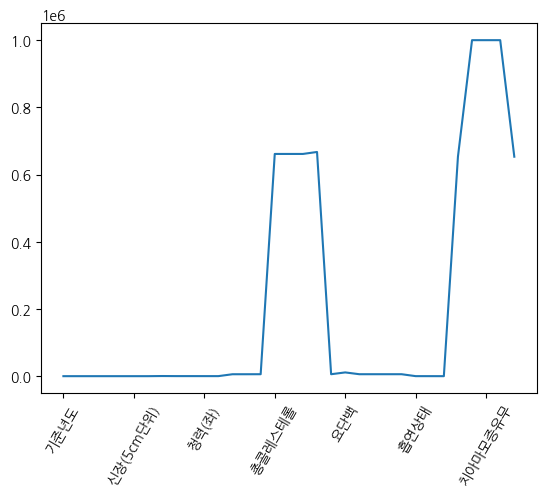

In [15]:
df.isna().sum().plot(rot=60)

In [16]:
#중복행 확인
df[df.duplicated()]

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석


중복행이 없다

### 4-3. 변수별로 특징 확인해보기
- 시각화
- 결측치 보완
- 전처리 시에는 기존 데이터 프레임을 유지 (복사본 만들기 .copy())

1. 연령대,성별 -> 허리둘레 분포 시각화
2. 흡연과 간기증관련 수치의 분포 확인
3. 신장,체중 간의 관련성

In [17]:
df_copy=df.copy()

In [18]:
df_copy.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [22]:
df_copy["연령대코드(5세단위)"].value_counts()
#R에서의 table()

연령대코드(5세단위)
11    127965
9     117307
13    113124
12     98632
10     93336
7      90527
14     73631
8      72393
6      70889
15     55414
5      33930
16     26779
17     20042
18      6031
Name: count, dtype: int64

<Axes: xlabel='연령대코드(5세단위)', ylabel='허리둘레'>

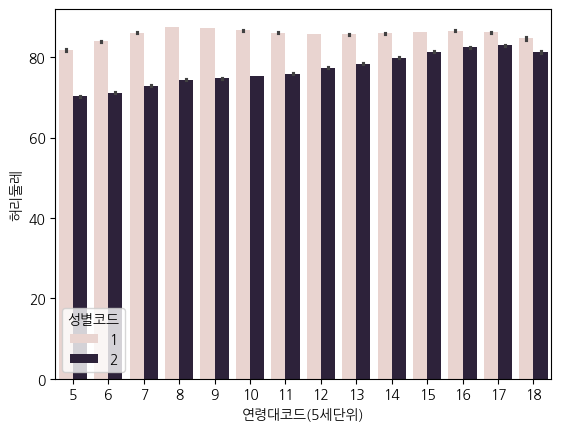

In [ ]:
# 연령대별 허리둘레의 평균을 시각화
sns.barplot(x="연령대코드(5세단위)", y="허리둘레", data=df_copy, hue="성별코드")
# barplot은 y값을 자동으로 평균내줌
# hue로 그룹화화

In [27]:
# 흡연여부와 간기능 수치
df_copy.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

<Axes: xlabel='흡연상태', ylabel='감마지티피'>

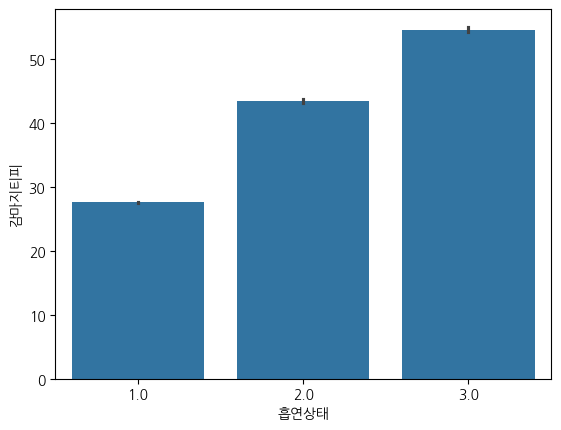

In [29]:
sns.barplot(x="흡연상태", y="감마지티피", data=df_copy)

<Axes: xlabel='흡연상태', ylabel='감마지티피'>

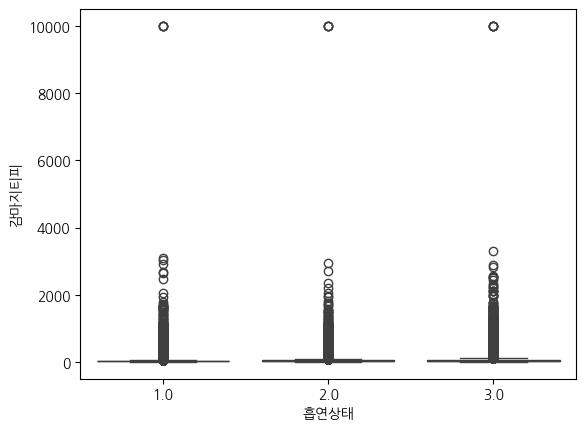

In [30]:
sns.boxplot(x="흡연상태", y="감마지티피", data=df_copy)

- 박스플롯을 그려보았더니 이상치가 있다
- 따라서 이를 제거해보자

In [32]:
# 박스플롯 IQR방법 사용하여 이상치 제거
df["감마지티피"].describe()


count    994187.000000
mean         35.382367
std          62.437751
min           1.000000
25%          15.000000
50%          22.000000
75%          37.000000
max        9999.000000
Name: 감마지티피, dtype: float64

In [45]:
q1=df_copy["감마지티피"].quantile(0.25)
q3=df_copy["감마지티피"].quantile(0.75)
iqr=q3-q1

In [46]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [47]:
#이상치 제거
df_boxplot = df_copy[((df_copy["감마지티피"]<upper_bound) & (df_copy["감마지티피"]>lower_bound))]

<Axes: xlabel='흡연상태', ylabel='감마지티피'>

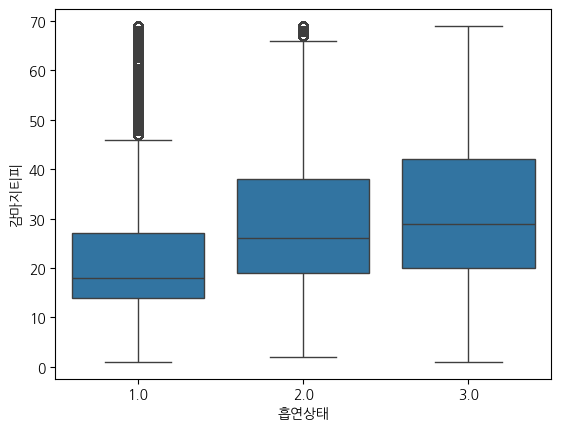

In [48]:
sns.boxplot(x="흡연상태", y="감마지티피", data=df_boxplot)

In [51]:
df_copy.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

Text(0.5, 1.0, '신장과 체중간의 분포')

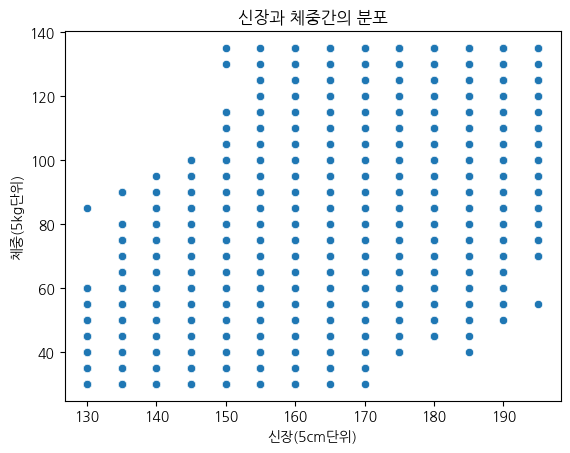

In [52]:
# 신장과 체중간의 관계 - 산점도
sns.scatterplot(x="신장(5cm단위)", y="체중(5kg단위)", data=df_copy)
plt.title("신장과 체중간의 분포")

Text(0.5, 1.0, '허리둘레와 체중간의 관계')

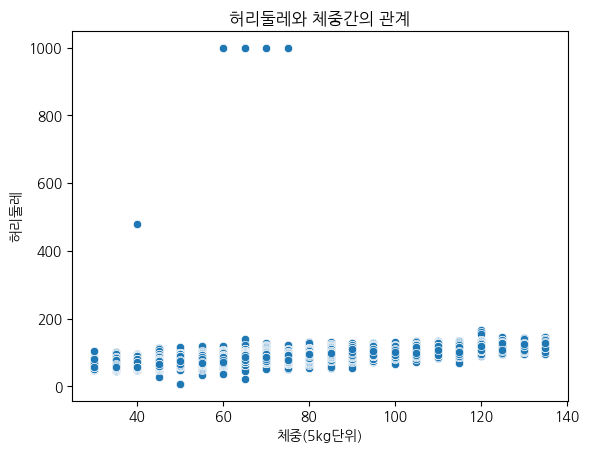

In [55]:
# 허리둘레와 체중간의 관계 산점도
sns.scatterplot(y="허리둘레", x="체중(5kg단위)", data=df_copy)
plt.title("허리둘레와 체중간의 관계")

이상치가 존재해서 그래프가 이상하다 <br>
허리둘레가 300이 넘어가면 이상하다 (도메인 지식) <br>
따라서 이상치로 판단, 이를 제거한다 <br>

In [58]:
df_copy=df_copy[df_copy["허리둘레"]<300]

Text(0.5, 1.0, '허리둘레와 체중간의 관계')

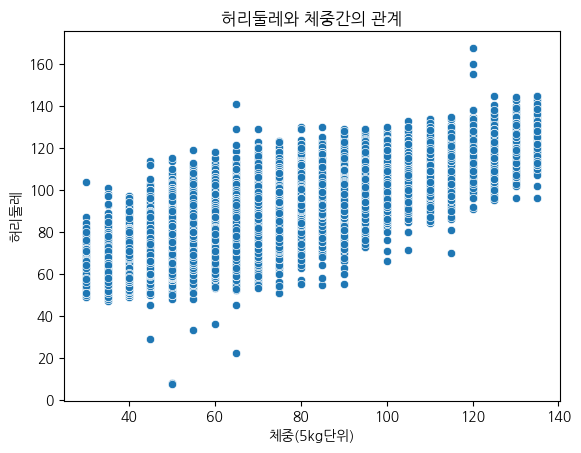

In [59]:
sns.scatterplot(y="허리둘레", x="체중(5kg단위)", data=df_copy)
plt.title("허리둘레와 체중간의 관계")

이상치가 제거되었다

추가적인 아이디어
- 콜레스테롤 지표 결측치 -> 제거
- 혈압, 혈당 관련 변수 <-> 연령대
- 지역별로 체질량지수의 변화